In [1]:
#import basic libaries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import string
import re
import emoji




In [2]:
#import nltk libaries
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to C:\Users\Elliott
[nltk_data]     Lam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Elliott
[nltk_data]     Lam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
#loading test csv
df = pd.read_csv('translation test.csv')

In [24]:
df.head()

,Unnamed: 0.1,Unnamed: 0,descriptions,titles,view_counts,channel_ids,publish_dates,tags,thumbnails,translated titles,translated tags,translated descriptions
0,0,0,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,幣圈熊市又一波？幣圈另類巨人Silvergate頂唔順 ｜又關FTX事｜廣告Rstaking,1116,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-03-10T15:51:27Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/SrrUfSnxA-k/de...,There is another wave of bear markets in the c...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
1,1,1,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,"幣圈熊市罪魁禍首 - 佢令到Bitcoin跌了50,000美金",1228,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-03-01T04:13:54Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/50pyDCuaLM8/de...,The culprit in the currency circle -has ordere...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
2,2,2,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,FTX前員工大爆料: 超誇張福利｜SBF被野生捕獲｜FTX無經驗都可以做高層｜用不完的錢,672,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-18T04:00:16Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/oDj_nSJGNNs/de...,Pre -FTX employee broke the news: Super exagge...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
3,3,3,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,[Airbnb] 連續12年蝕錢，上市市值即過千億｜全世界最大的房地產公司｜「共享經濟」市場...,1064,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-14T06:00:08Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/SQMY0NnmEuk/de...,[Airbnb] Extracting money for 12 consecutive y...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...
4,4,4,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,[Celsius破產] 手法比FTX更高章｜客戶既錢就係我既錢 ｜魔鬼就在細節中,796,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-11T11:30:06Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/O-OeytUFyhY/de...,[Celsius bankruptcy] Higher chapter than FTX ｜...,"['Investment', 'to get rich', 'make money', 'r...",Blockz Finance is a one-stop channel for your ...


In [25]:
#creating a text cleaning function
def text_cleaning(text):
    # Convert text to lowercase
    text = text.lower()
        
    # Remove emojis
    text = emoji.demojize(text)
        
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        
    # # Tokenize the text
    # text_tokens = word_tokenize(text)
        
    # # Remove stop words
    # # stop_words = set(stopwords.words('english'))
    # # filtered_text = [w for w in text_tokens if not w in stop_words]
    
    # # Join the filtered tokens into a single string
    # cleaned_text = " ".join(filtered_text)
    
    return text

In [26]:
#testing on translated tags only
df2 = df['translated tags'] = df['translated tags'].apply(text_cleaning)
df2.head()

0    investment to get rich make money rich people ...
1    investment to get rich make money rich people ...
2    investment to get rich make money rich people ...
3    investment to get rich make money rich people ...
4    investment to get rich make money rich people ...
Name: translated tags, dtype: object

In [27]:
#testing on more columns 
columns_to_translate = ['translated titles', 'translated tags', 'translated descriptions']

for column in columns_to_translate:
    df[f'cleaned {column}'] = df[column].apply(text_cleaning)

In [28]:
df.head()

,Unnamed: 0.1,Unnamed: 0,descriptions,titles,view_counts,channel_ids,publish_dates,tags,thumbnails,translated titles,translated tags,translated descriptions,cleaned translated titles,cleaned translated tags,cleaned translated descriptions
0,0,0,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,幣圈熊市又一波？幣圈另類巨人Silvergate頂唔順 ｜又關FTX事｜廣告Rstaking,1116,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-03-10T15:51:27Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/SrrUfSnxA-k/de...,There is another wave of bear markets in the c...,investment to get rich make money rich people ...,Blockz Finance is a one-stop channel for your ...,there is another wave of bear markets in the c...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
1,1,1,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,"幣圈熊市罪魁禍首 - 佢令到Bitcoin跌了50,000美金",1228,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-03-01T04:13:54Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/50pyDCuaLM8/de...,The culprit in the currency circle -has ordere...,investment to get rich make money rich people ...,Blockz Finance is a one-stop channel for your ...,the culprit in the currency circle has ordered...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
2,2,2,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,FTX前員工大爆料: 超誇張福利｜SBF被野生捕獲｜FTX無經驗都可以做高層｜用不完的錢,672,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-18T04:00:16Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/oDj_nSJGNNs/de...,Pre -FTX employee broke the news: Super exagge...,investment to get rich make money rich people ...,Blockz Finance is a one-stop channel for your ...,pre ftx employee broke the news super exaggera...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
3,3,3,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,[Airbnb] 連續12年蝕錢，上市市值即過千億｜全世界最大的房地產公司｜「共享經濟」市場...,1064,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-14T06:00:08Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/SQMY0NnmEuk/de...,[Airbnb] Extracting money for 12 consecutive y...,investment to get rich make money rich people ...,Blockz Finance is a one-stop channel for your ...,airbnb extracting money for 12 consecutive yea...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
4,4,4,Blockz Finance 是您獲取商業思維、加密貨幣世界重點資訊的一站式頻道 2023-...,[Celsius破產] 手法比FTX更高章｜客戶既錢就係我既錢 ｜魔鬼就在細節中,796,UCcAyw5OwGXDMJfFx3q9U4XQ,2023-01-11T11:30:06Z,"['投資', '致富', '賺錢', '有錢人', '區塊鏈', '比特幣', 'bitco...",{'url': 'https://i.ytimg.com/vi/O-OeytUFyhY/de...,[Celsius bankruptcy] Higher chapter than FTX ｜...,investment to get rich make money rich people ...,Blockz Finance is a one-stop channel for your ...,celsius bankruptcy higher chapter than ftx cu...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...


In [32]:
#getting the cleaned titles, tags, descriptions
df3 = df[['channel_ids', 'cleaned translated titles', 'cleaned translated tags', 'cleaned translated descriptions']].copy()
df3.head()

,channel_ids,cleaned translated titles,cleaned translated tags,cleaned translated descriptions
0,UCcAyw5OwGXDMJfFx3q9U4XQ,there is another wave of bear markets in the c...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
1,UCcAyw5OwGXDMJfFx3q9U4XQ,the culprit in the currency circle has ordered...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
2,UCcAyw5OwGXDMJfFx3q9U4XQ,pre ftx employee broke the news super exaggera...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
3,UCcAyw5OwGXDMJfFx3q9U4XQ,airbnb extracting money for 12 consecutive yea...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...
4,UCcAyw5OwGXDMJfFx3q9U4XQ,celsius bankruptcy higher chapter than ftx cu...,investment to get rich make money rich people ...,blockz finance is a onestop channel for your b...


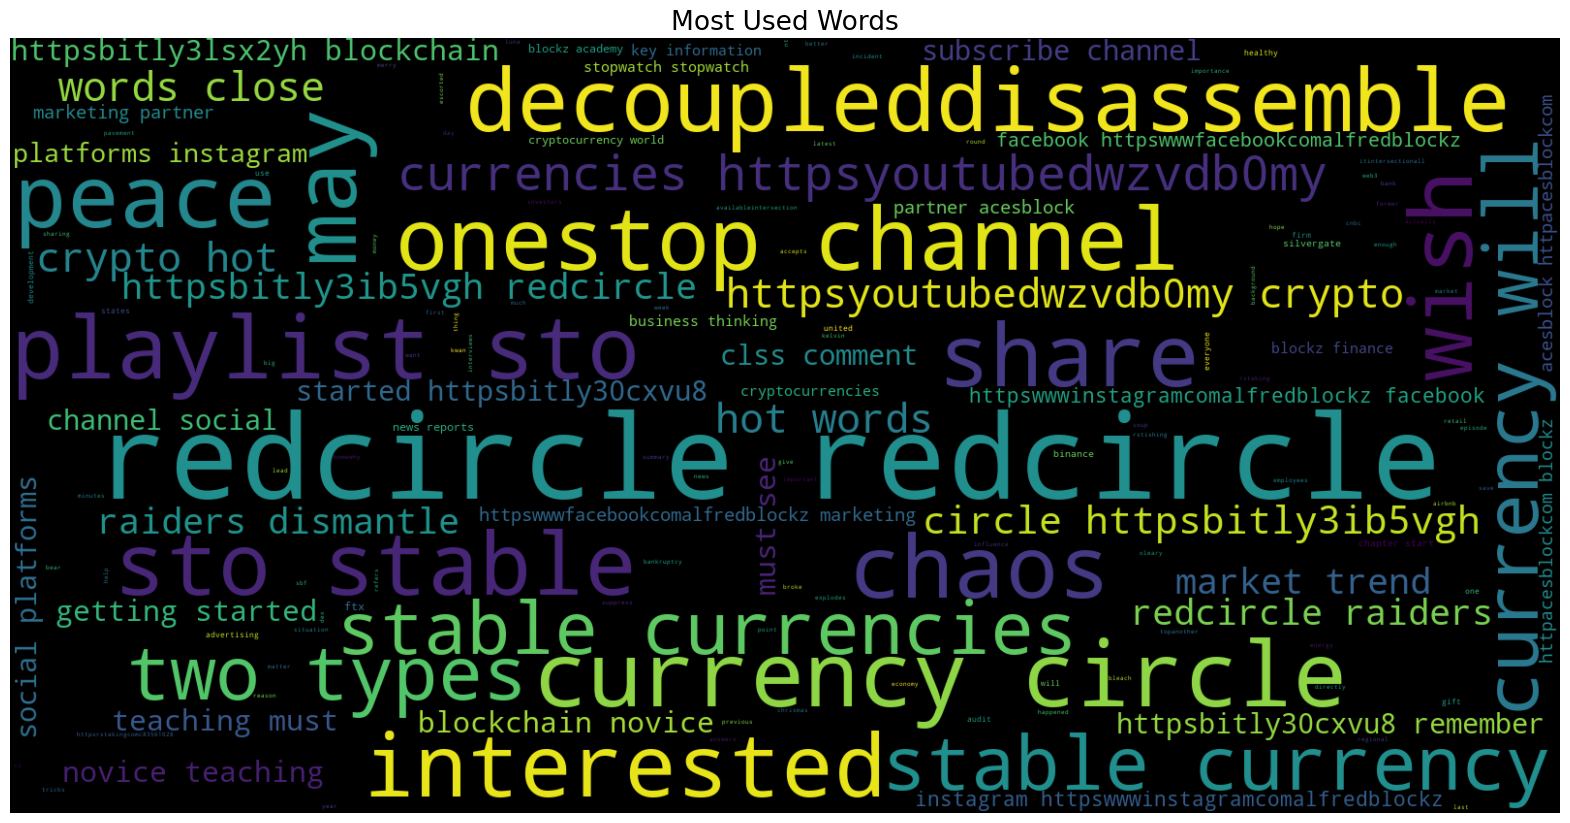

In [70]:
#visualize the most used words in descriptions by using word cloud
text = ' '.join(df3['cleaned translated descriptions'])
plt.figure(figsize = (20,15), facecolor = 'none')
wordcloud = WordCloud(max_words = 500, width = 1600, height = 800).generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most Used Words', fontsize = 19)

plt.show()

In [ ]:
'''
in this small sample we are still seeing some links popping up a lot. depending on the rest of the data when scaled, we may need to update the cleaning function to recognize and remove links
'''

In [39]:
#create a df from desctiptions
descriptions = pd.DataFrame(df3['cleaned translated descriptions'])
descriptions.head()


,cleaned translated descriptions
0,blockz finance is a onestop channel for your b...
1,blockz finance is a onestop channel for your b...
2,blockz finance is a onestop channel for your b...
3,blockz finance is a onestop channel for your b...
4,blockz finance is a onestop channel for your b...


In [ ]:
''' 
i think the above should be the basic flow for preprocessing the desciptions, can be scaled or applied to other columns as well.
'''

In [66]:
#trying manual word counts of unique words
# get unique word

def get_unique_words(data_frame, column_name):
    words = data_frame[column_name].str.split().explode()
    unique_words = words.unique()
    return unique_words


In [67]:
def count_word_frequency(data_frame, column_name):
    words = data_frame[column_name].str.split().explode()
    word_counts = words.value_counts()
    return word_counts

In [60]:
unique_words = get_unique_words(descriptions, 'cleaned translated descriptions')
unique_words


array(['blockz', 'finance', 'is', 'a', 'onestop', 'channel', 'for',
       'your', 'business', 'thinking', 'and', 'key', 'information', 'of',
       'cryptocurrencies', '20230311', 'advertising', 'in', 'this',
       'episode', 'rstishing', 'httpsrstakingcomc83561028', 'silvergate',
       'topanother', 'round', 'bear', 'market', 'i', 'wish', 'you',
       'peace', 'the', 'chaos', 'stopwatch', 'chapter', 'start', 'at',
       '0000', '0041', 'bank', 'background', 'importance', '0324',
       'rstaking', '0533', 'happened', 'homewhy', 'reason', '0819',
       'united', 'states', 'suppress', 'cryptos', 'regional',
       'development', 'currency', 'circle', 'may', 'be', 'interested',
       'playlist', 'sto', 'stable', 'will', 'also',
       'decoupleddisassemble', 'two', 'types', 'currencies',
       'httpsyoutubedwzvdb0my', 'crypto', 'hot', 'words', 'close', 'to',
       'httpsbitly3ib5vgh', 'redcircle', 'raiders', 'dismantle', 'trend',
       'with', 'httpsbitly3lsx2yh', 'blockchain',

In [69]:
word_counts = count_word_frequency(descriptions, 'cleaned translated descriptions')
word_counts

cleaned translated descriptions
the          64
you          34
redcircle    30
to           28
of           27
             ..
20230114      1
want          1
broke         1
employees     1
incident      1
Name: count, Length: 213, dtype: int64

In [62]:
print(len(unique_words))

213
